# FIFA World Cup Analysis.

By Sumeetkumar Tripathi | 25th September | tripathisumit249@gmail.com

# 1. Importing Libraries & Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Importing the and getting overview of the datasets

In [2]:
# Importing all 3 FIFA datasets

df_matches = pd.read_csv('WorldCupMatches.csv')
df_players = pd.read_csv('WorldCupPlayers.csv')
df_cups = pd.read_csv('WorldCups.csv')

Getting the information on columns of all the datasets

In [3]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

> All columns are filled only till 852 rows And no data has been recorded. So we will clean and consider the Matches Dataset til 852 rows when we start the data preprocessing work.

In [4]:
# Updating the Matches Dataset to consider only 852 rows

df_matches = df_matches[:852]

In [5]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [6]:
df_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [7]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [9]:
df_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


# 3. Data Preprocessing

## Treating the unwanted columns

We have to remove the unwanted columns from all 3 datasets. SO that they won't affect our analysis.

In [10]:
# Making a list of unwanted columns in Matches Dataset

unwanted_columns = [
    'City',
    'Stadium',
    'Win conditions',
    'Attendance',
    'Referee',
    'Assistant 1',
    'Assistant 2',
    'Datetime'
]

# Dropping the unwanted columns from the Matches Dataset

df_matches = df_matches.drop(columns=unwanted_columns)

In [11]:
# Updating the list of unwanted columns for Players Dataset

unwanted_columns = ['Shirt Number', 'Event']

# Dropping the unwanted columns from the Matches Dataset

df_players = df_players.drop(columns=unwanted_columns)

In [12]:
# Updating the list of unwanted columns for Cups Dataset

unwanted_columns = ['Country', 'Attendance']

# Dropping the unwanted columns from the Matches Dataset

df_cups = df_cups.drop(columns=unwanted_columns)

> All unwanted columns are dropped from all the datasets. But there are some possibilities that columns may be removed in further analysis.

## Treating the missing values

In [13]:
# Creating a function to check the percentage of missing values

def check_null_percentage(dataset):
    return ((dataset.isnull().sum()/len(dataset)) * 100)

In [14]:
# Checking the null values in the Matches Dataset

check_null_percentage(df_matches)

Year                    0.0
Stage                   0.0
Home Team Name          0.0
Home Team Goals         0.0
Away Team Goals         0.0
Away Team Name          0.0
Half-time Home Goals    0.0
Half-time Away Goals    0.0
RoundID                 0.0
MatchID                 0.0
Home Team Initials      0.0
Away Team Initials      0.0
dtype: float64

> There are no null values in the Matches Dataset.

In [15]:
# Checking the null values in the Players Dataset

check_null_percentage(df_players)

RoundID           0.000000
MatchID           0.000000
Team Initials     0.000000
Coach Name        0.000000
Line-up           0.000000
Player Name       0.000000
Position         89.035041
dtype: float64

> `Postion` column has 89.03% of null values. We have to remove it from the Players dataset.

In [16]:
df_players = df_players.drop(columns=['Position'])

In [17]:
# Checking the null values again in the Players Dataset

check_null_percentage(df_players)

RoundID          0.0
MatchID          0.0
Team Initials    0.0
Coach Name       0.0
Line-up          0.0
Player Name      0.0
dtype: float64

> There are no null values in the Players Dataset.

In [18]:
# Checking the null values again in the Cups Dataset

check_null_percentage(df_cups)

Year              0.0
Winner            0.0
Runners-Up        0.0
Third             0.0
Fourth            0.0
GoalsScored       0.0
QualifiedTeams    0.0
MatchesPlayed     0.0
dtype: float64

> There are no null values in the Cups Dataset.

## Checking the distribution in the datasets.

We will check for the distribution in few columns in all datasets.

In [19]:
# Checking values for Stage column in Matches Dataset.

df_matches['Stage'].value_counts()

Round of 16                 72
Quarter-finals              66
Group 1                     62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group C                     48
Group D                     48
Group E                     48
Group F                     48
Semi-finals                 36
Group G                     30
Group H                     30
Final                       20
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Third place                  2
Play-off for third place     2
Name: Stage, dtype: int64

> Stage column has good distribution of categorical data

In [20]:
# Checking the distribution of the Cups Dataset.

df_cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


## Standardizing the datasets

Cheking the distribution of Home team names.

In [21]:
df_matches['Home Team Name'].value_counts().index.tolist()

['Brazil',
 'Italy',
 'Argentina',
 'Germany FR',
 'England',
 'Germany',
 'Netherlands',
 'France',
 'Spain',
 'Uruguay',
 'Sweden',
 'Hungary',
 'Soviet Union',
 'Belgium',
 'Yugoslavia',
 'Mexico',
 'Portugal',
 'Poland',
 'USA',
 'Chile',
 'Korea Republic',
 'Austria',
 'Switzerland',
 'Cameroon',
 'Paraguay',
 'Japan',
 'Czechoslovakia',
 'Nigeria',
 'Romania',
 'Scotland',
 'Colombia',
 'Bulgaria',
 'Costa Rica',
 'Denmark',
 'Saudi Arabia',
 'South Africa',
 'Australia',
 'Algeria',
 'rn">Republic of Ireland',
 'Honduras',
 'Peru',
 'Northern Ireland',
 'Ghana',
 'Tunisia',
 'Ecuador',
 'Morocco',
 'Greece',
 'Croatia',
 'Slovenia',
 "C�te d'Ivoire",
 'German DR',
 'Korea DPR',
 'Russia',
 'Senegal',
 'Cuba',
 'Turkey',
 'Togo',
 'Czech Republic',
 'Zaire',
 'Slovakia',
 'Iraq',
 'Serbia',
 'New Zealand',
 'IR Iran',
 'Iran',
 'Ukraine',
 'Canada',
 'Angola',
 'rn">Serbia and Montenegro',
 'rn">Trinidad and Tobago',
 'China PR',
 'Jamaica',
 'Bolivia',
 'Wales',
 'Norway',
 'rn"

In [22]:
df_matches['Away Team Name'].value_counts().index.tolist()

['Mexico',
 'France',
 'Spain',
 'Argentina',
 'England',
 'Italy',
 'Brazil',
 'Belgium',
 'Uruguay',
 'Netherlands',
 'Switzerland',
 'Chile',
 'Yugoslavia',
 'Czechoslovakia',
 'USA',
 'Bulgaria',
 'Sweden',
 'Germany FR',
 'Korea Republic',
 'Paraguay',
 'Austria',
 'Poland',
 'Hungary',
 'Germany',
 'Scotland',
 'Soviet Union',
 'Croatia',
 'Colombia',
 'Cameroon',
 'Romania',
 'Costa Rica',
 'Peru',
 'Nigeria',
 'Portugal',
 'Morocco',
 'Denmark',
 'Tunisia',
 'rn">Republic of Ireland',
 'Ghana',
 'Turkey',
 'Algeria',
 'Northern Ireland',
 'Australia',
 'Saudi Arabia',
 'Japan',
 'Norway',
 'Greece',
 "C�te d'Ivoire",
 'Russia',
 'Ecuador',
 'El Salvador',
 'New Zealand',
 'Iran',
 'IR Iran',
 'Bolivia',
 'Egypt',
 'Korea DPR',
 'Wales',
 'Ukraine',
 'Honduras',
 'Kuwait',
 'German DR',
 'Israel',
 'South Africa',
 'Senegal',
 'Slovenia',
 'Serbia',
 'Slovakia',
 'Angola',
 'rn">Serbia and Montenegro',
 'rn">Trinidad and Tobago',
 'Jamaica',
 'China PR',
 'Haiti',
 'rn">United A

Out of these team names, following team names are looking distorted.

- `C�te d'Ivoire`
- `rn">Trinidad and Tobago`
- `rn">Serbia and Montenegro`
- `rn">Bosnia and Herzegovina`
- `rn">United Arab Emirates`
- `rn">Republic of Ireland`

And there are some team names that refer to same country
- `Germany FR` -> `Germany`
- `IR Iran` -> `Iran`

And we will rename some teams that create slight confusion.
- Korean Republic
- Korea DR

In [23]:
team_name_corrections = {
    "C�te d'Ivoire" : 'Cote dIvoire',
    'rn">Trinidad and Tobago': 'Trinidad and Tobago',
    'rn">Serbia and Montenegro':'Serbia',
    'rn">Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'rn">United Arab Emirates': 'United Arab Emirates',
    'rn">Republic of Ireland': 'Republic of Ireland',
    'Germany FR':'Germany',
    'Korea DR': 'North Korea',
    'Korea Republic': 'South Korea',
    'IR Iran': 'Iran'
}

In [24]:
for team in team_name_corrections:
    
    df_matches['Home Team Name'] = df_matches['Home Team Name'].replace(team, team_name_corrections[team])
    df_matches['Away Team Name'] = df_matches['Away Team Name'].replace(team, team_name_corrections[team])
    df_cups.replace(team, team_name_corrections[team], inplace=True)

In [25]:
# Checking the names again

set(df_matches['Home Team Name'].value_counts().index.tolist()).union(set(df_matches['Away Team Name'].value_counts().index.tolist()))

{'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Cote dIvoire',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'United Arab 

> All team names are now perfectly formatted.

In [26]:
# Creating a function which will get the name of the team by providing its initials

def get_team_names(initial):

    relevant_matches = df_matches[
        (df_matches['Home Team Initials'] == initial) | (df_matches['Away Team Initials'] == initial)
    ]
    
    homeName = relevant_matches[relevant_matches['Home Team Initials'] == initial]['Home Team Name'].value_counts().index[:1]
    awayName = relevant_matches[relevant_matches['Away Team Initials'] == initial]['Away Team Name'].value_counts().index[:1]

    homeName = homeName[0] if len(homeName) > 0 else None
    awayName = awayName[0] if len(awayName) > 0 else None

    return homeName or awayName or 'None'

In [27]:
# Introducing a new column for team full names

df_players['Team Name'] = df_players['Team Initials'].apply(get_team_names)

In [28]:
# Dropping the columns from Players Dataset which are not needed.

df_players = df_players.drop(columns=['Team Initials'])

In [29]:
# Creating a new column in Matches Dataset which will contain match winner.

df_matches['matchWinner'] = df_matches.apply(
    lambda row: row['Home Team Name'] if row['Home Team Goals'] > row['Away Team Goals'] 
                else (row['Away Team Name'] if row['Away Team Goals'] > row['Home Team Goals'] 
                      else 'Draw'), axis=1)

In [30]:
df_matches.columns

Index(['Year', 'Stage', 'Home Team Name', 'Home Team Goals', 'Away Team Goals',
       'Away Team Name', 'Half-time Home Goals', 'Half-time Away Goals',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'matchWinner'],
      dtype='object')

In [31]:
# Dropping the columns from Matches Dataset which are not needed.

df_matches = df_matches.drop(columns=['Home Team Initials', 'Away Team Initials'])

> Now we will rename the columns from all the datasets for better accessibility.

In [32]:
df_cups.columns

Index(['Year', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'GoalsScored',
       'QualifiedTeams', 'MatchesPlayed'],
      dtype='object')

In [33]:
# Creating dictionaries for renaming the columns

new_matches_columns = {
    'Year': 'year',
    'Datetime': 'datetime',
    'Stage': 'stage',
    'Home Team Name': 'homeTeam',
    'Home Team Goals': 'homeGoals',
    'Away Team Goals': 'awayGoals',
    'Away Team Name': 'awayTeam',
    'Half-time Home Goals': 'homeHalfTimeGoals',
    'Half-time Away Goals': 'awayHalfTimeGoals',
    'RoundID': 'roundId',
    'MatchID': 'matchId'
}

new_players_columns = {
    'RoundID': 'roundId',
    'MatchID': 'matchId',
    'Coach Name': 'coachName',
    'Line-up': 'lineUp',
    'Player Name': 'playerName',
    'Team Name': 'teamName'
}

new_cups_columns = {
    'Year': 'year',
    'Winner': 'winner',
    'Runners-Up': 'runnersUp',
    'Third': 'third',
    'Fourth': 'fourth',
    'GoalsScored': 'goalsScored',
    'QualifiedTeams': 'qualifiedTeams',
    'MatchesPlayed': 'matchesPlayed'
}

In [34]:
# Renaming the columns in all datasets

df_matches = df_matches.rename(columns=new_matches_columns)
df_players = df_players.rename(columns=new_players_columns)
df_cups = df_cups.rename(columns=new_cups_columns)

## Assigning the correct datatypes in all datasets

Checking the datatypes again.

In [35]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               852 non-null    float64
 1   stage              852 non-null    object 
 2   homeTeam           852 non-null    object 
 3   homeGoals          852 non-null    float64
 4   awayGoals          852 non-null    float64
 5   awayTeam           852 non-null    object 
 6   homeHalfTimeGoals  852 non-null    float64
 7   awayHalfTimeGoals  852 non-null    float64
 8   roundId            852 non-null    float64
 9   matchId            852 non-null    float64
 10  matchWinner        852 non-null    object 
dtypes: float64(7), object(4)
memory usage: 73.3+ KB


In [36]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   roundId     37784 non-null  int64 
 1   matchId     37784 non-null  int64 
 2   coachName   37784 non-null  object
 3   lineUp      37784 non-null  object
 4   playerName  37784 non-null  object
 5   teamName    37784 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [37]:
df_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            20 non-null     int64 
 1   winner          20 non-null     object
 2   runnersUp       20 non-null     object
 3   third           20 non-null     object
 4   fourth          20 non-null     object
 5   goalsScored     20 non-null     int64 
 6   qualifiedTeams  20 non-null     int64 
 7   matchesPlayed   20 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.4+ KB


In [38]:
# Changing the datatypes in the matches dataset

df_matches = df_matches.astype({
    'year': 'int',
    'homeGoals': 'int',
    'awayGoals': 'int',
    'homeHalfTimeGoals': 'int',
    'awayHalfTimeGoals': 'int',
    'roundId':'int',
    'matchId':'int'
})

# 4. Data Visualization

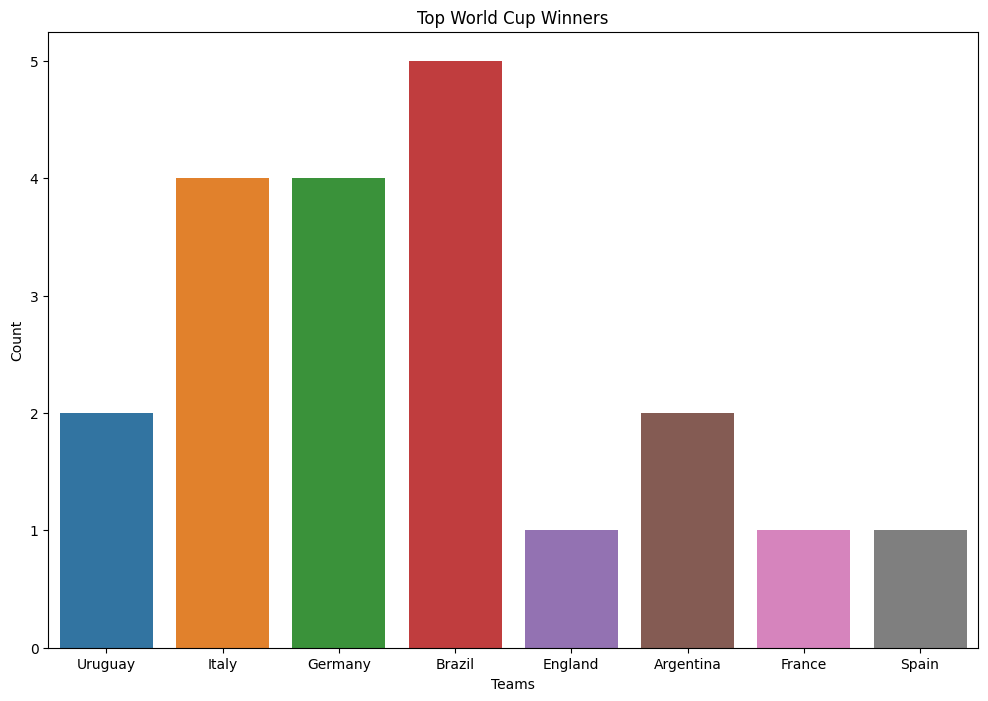

In [39]:
# Checking what team has won the maximum number of world cups.

plt.figure(figsize=(12, 8))
sns.countplot(data=df_cups, x='winner')

# Customize the plot (optional)
plt.title('Top World Cup Winners')
plt.xlabel('Teams')
plt.ylabel('Count')

# Show the plot
plt.show()

> `Brazil` has won the most number of world cups. In all these years.

In [40]:
# Making a function for giving the performace on the worldcup winning years

def givePerformance(teamNames):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    for teamName in teamNames:
        win_year_list = df_cups[df_cups['winner'] == teamName]['year'].tolist()
        performance = {}

        for year in win_year_list:
            df = df_matches[
                (df_matches['year'] == year) &
                ((df_matches['homeTeam'] == teamName) | (df_matches['awayTeam'] == teamName))
            ]
            
            team_goals = df[df['homeTeam'] == teamName]['homeGoals'].sum() + df[df['awayTeam'] == teamName]['awayGoals'].sum()
            performance[year] = team_goals

        years = list(performance.keys())
        goals = list(performance.values())

        sns.lineplot(x=years, y=goals, marker='o', label=teamName)

        for year, goal in zip(years, goals):
            plt.annotate(f'{goal} goals', xy=(year, goal), xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')

    plt.title(f"Performance of World Cup Winning Teams Over Years", fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Goals Scored', fontsize=14)
    plt.legend(title="Teams")
    plt.show()


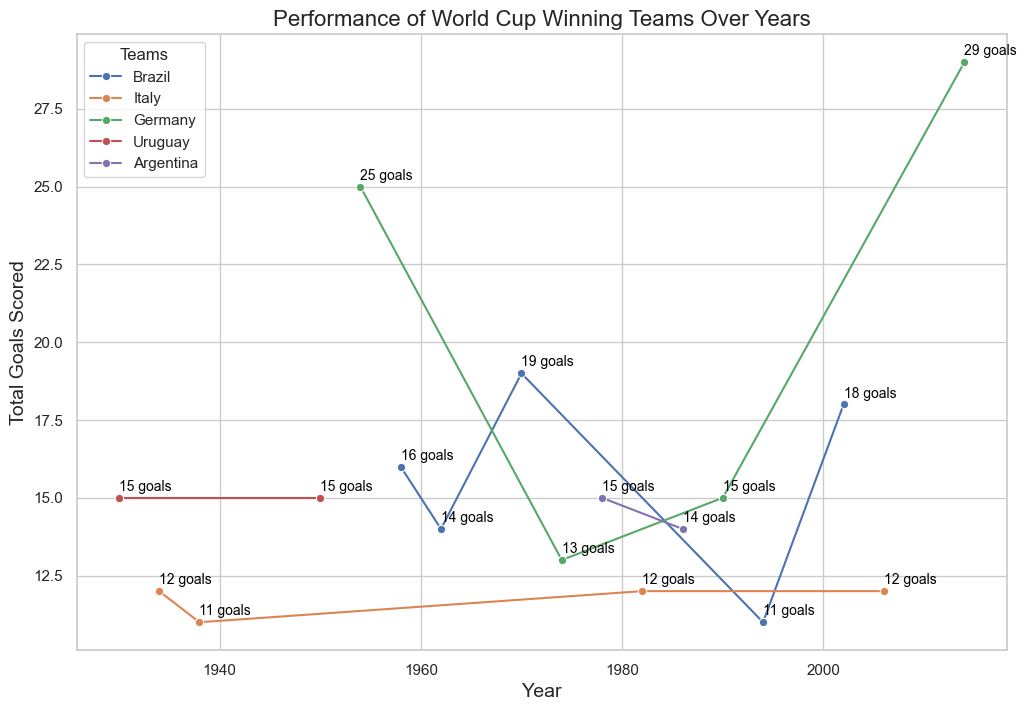

In [41]:
# Visualizing the performances of top 5 world cup winnig teams

givePerformance(['Brazil', 'Italy', 'Germany', 'Uruguay', 'Argentina'])

> In the world cup seasons<br>`Brazil` and `Germany` play aggressively, they focus on attacking.<br>`Uruguay`, `Argentina`, `Italy` play with a stable manner and they focus on defense.

In [42]:
def giveHalfTimePerformance(teamNames):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    for teamName in teamNames:
        win_year_list = df_cups[df_cups['winner'] == teamName]['year'].tolist()
        performance = {}

        for year in win_year_list:
            df = df_matches[
                (df_matches['year'] == year) &
                ((df_matches['homeTeam'] == teamName) | (df_matches['awayTeam'] == teamName))
            ]
            
            team_goals = df[df['homeTeam'] == teamName]['homeHalfTimeGoals'].sum() + df[df['awayTeam'] == teamName]['awayHalfTimeGoals'].sum()
            performance[year] = team_goals

        years = list(performance.keys())
        goals = list(performance.values())

        sns.lineplot(x=years, y=goals, marker='o', label=teamName)

        for year, goal in zip(years, goals):
            plt.annotate(f'{goal} goals', xy=(year, goal), xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')

    plt.title(f"Performance of World Cup Winning Teams Over Years", fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total goals scored in half time', fontsize=14)
    plt.legend(title="Teams")
    plt.show()


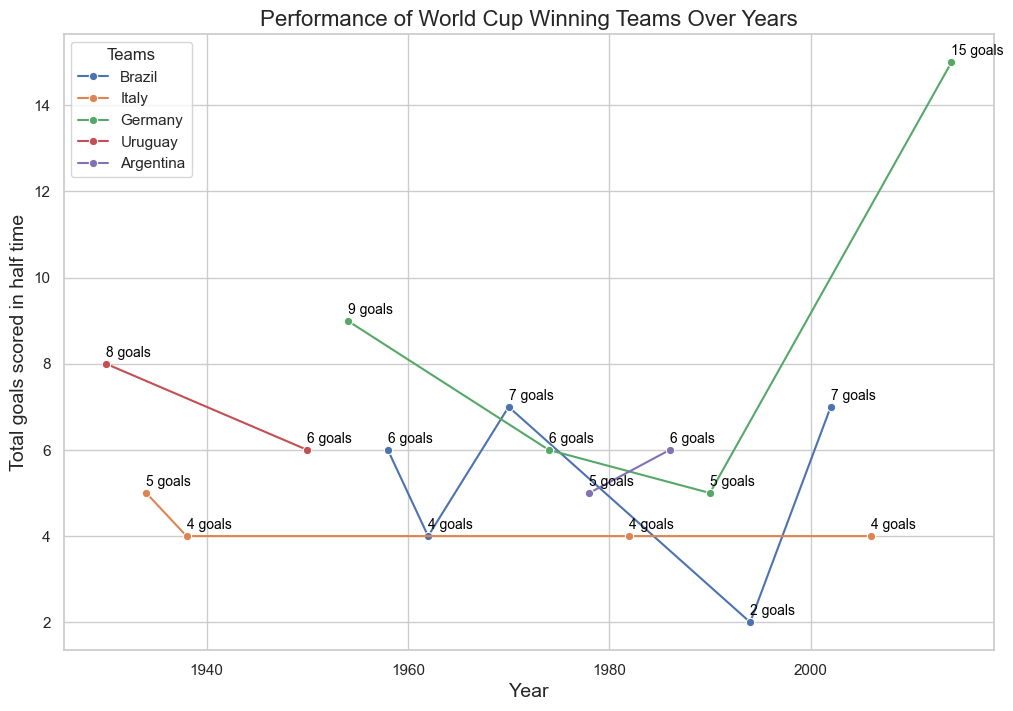

In [43]:
giveHalfTimePerformance(['Brazil', 'Italy', 'Germany', 'Uruguay', 'Argentina'])

> In the world cup seasons<br>`Brazil` and `Germany` play aggressively, they focus on attacking.<br>`Uruguay`, `Argentina`, `Italy` play with a stable manner and they focus on defense.

In [44]:
def check_home_away_goals(teamList):
    countryList = []
    homeGoalsList = []
    awayGoalsList = []
    
    for team in teamList:
        homeGoals = df_matches[df_matches.homeTeam == team].homeGoals.sum()
        awayGoals = df_matches[df_matches.awayTeam == team].awayGoals.sum()
        
        countryList.append(team)
        homeGoalsList.append(homeGoals)
        awayGoalsList.append(awayGoals)
        

    dataframe = pd.DataFrame({
        'Countries': countryList,
        'Home Goals': homeGoalsList,
        'Away Goals': awayGoalsList
    })
    

    melted_df = dataframe.melt(id_vars='Countries', value_vars=['Home Goals', 'Away Goals'],
                               var_name='Location', value_name='Goals')
    

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Countries', y='Goals', hue='Location', data=melted_df)
    plt.title('Total Goals by Country at Home and Away in World Cups')
    plt.xlabel('Country')
    plt.ylabel('Goals')
    plt.xticks(rotation=45)
    plt.legend(title='Location')
    plt.show()

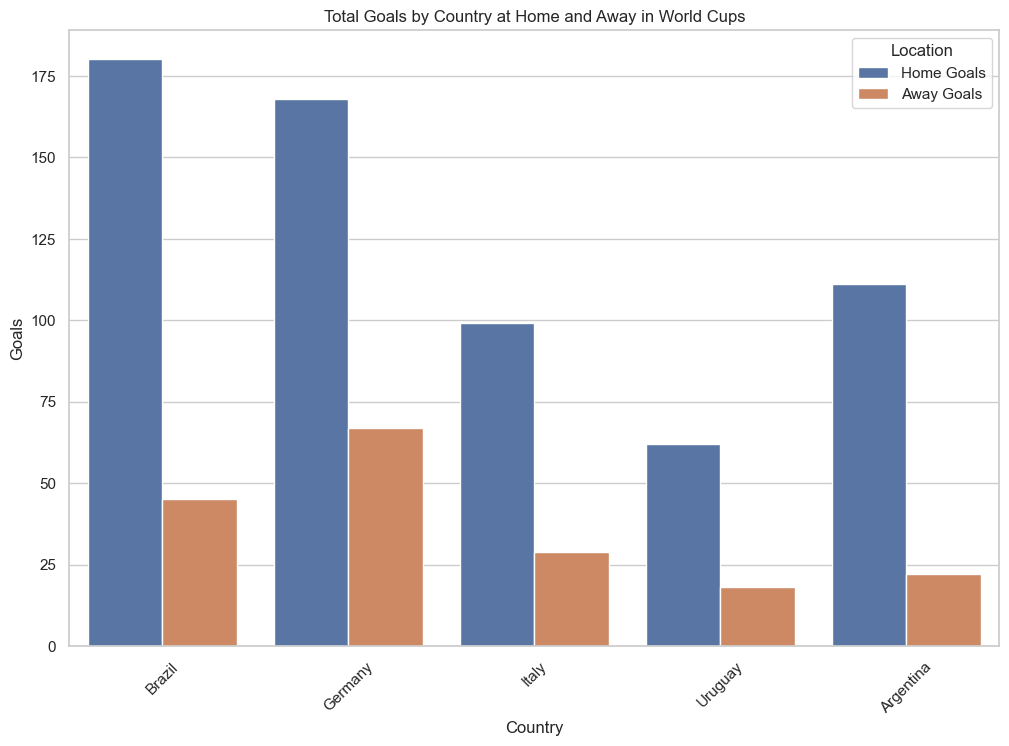

In [45]:
check_home_away_goals(['Brazil', 'Germany', 'Italy', 'Uruguay', 'Argentina'])

> Top teams tend to perform better when playing at home. Clearly here home field gives an advantage.

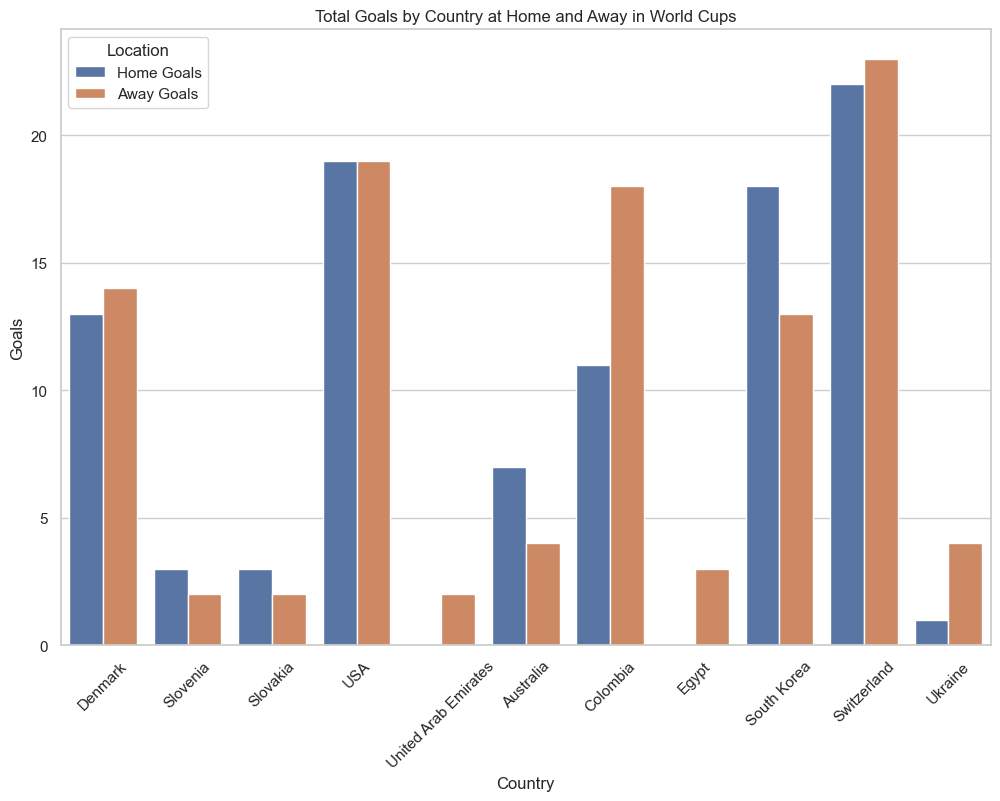

In [46]:
# Checking other team performance

check_home_away_goals([
    'Denmark', 
    'Slovenia', 
    'Slovakia', 
    'USA', 
    'United Arab Emirates', 
    'Australia', 
    'Colombia',
    'Egypt',
    'South Korea',
    'Switzerland',
    'Ukraine'
])

> Here for non winning teams Home or Away field advantage is not significant.

In [47]:
# Checking the coach for the winning teams

def get_coach_influence(team):
    

    team_players = df_players[df_players.teamName == team][['matchId', 'coachName']]

    # Filter df_matches for matchId 1093 and select columns
    match_details = df_matches[['matchId', 'matchWinner']]

    # Merge the two DataFrames on 'matchId'
    merged_df = pd.merge(team_players, match_details, on='matchId')
    
    merged_df = merged_df.drop_duplicates()
    
    merged_df = merged_df[merged_df.matchWinner == team].coachName.value_counts().head().reset_index()
    

    sns.barplot(x=merged_df.iloc[:,0], y=merged_df.iloc[:,1], data=merged_df, palette='viridis')
    plt.xlabel('Coach Name')
    plt.ylabel('Total Career Wins by Coach')
    plt.title(f'Coach influence in winning of {team}')
    plt.xticks(rotation=45, ha='right')
    
    
    championMatches = df_matches[(df_matches.stage == "Final") & (df_matches.matchWinner == team)].matchId.tolist()
    championCoaches = []
    
    for id in championMatches:
        championCoach = df_players[(df_players.matchId == id) & (df_players.teamName == team)].coachName.value_counts().index[0]
        championCoaches.append(championCoach)
        
    championCoaches = set(championCoaches)
      
    champion_coaches_df = pd.DataFrame(list(championCoaches), columns=['WorldCup Winning Coaches'])
        
    return champion_coaches_df

,WorldCup Winning Coaches
0,MOREIRA Aymore (BRA)
1,SCOLARI Luiz Felipe (BRA)
2,ZAGALLO Mario (BRA)
3,FEOLA Vicente (BRA)


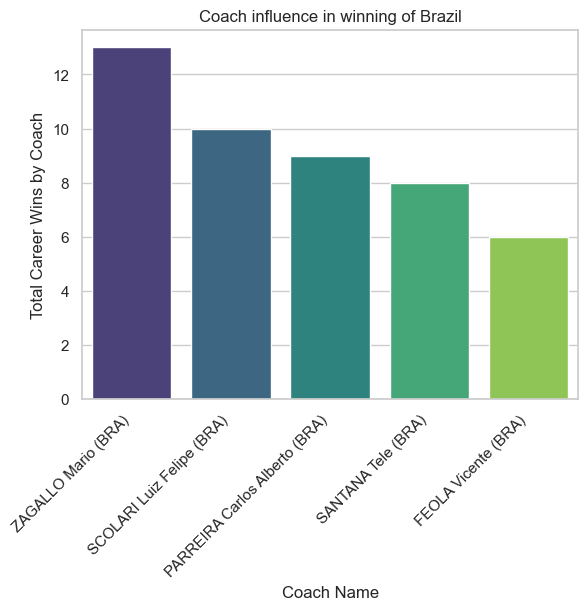

In [48]:
get_coach_influence('Brazil')

,WorldCup Winning Coaches
0,SCHOEN Helmut (FRG)
1,BECKENBAUER Franz (GER)
2,LOEW Joachim (GER)
3,HERBERGER Sepp (FRG)


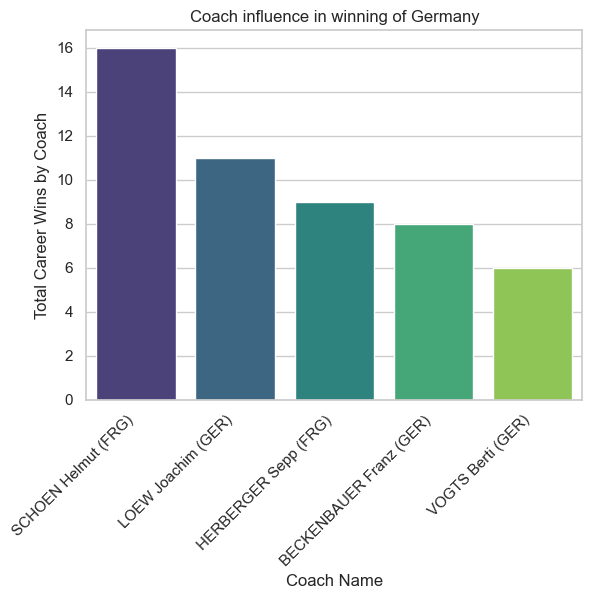

In [49]:
get_coach_influence('Germany')

,WorldCup Winning Coaches
0,BILARDO Carlos (ARG)
1,MENOTTI Cesar Luis (ARG)


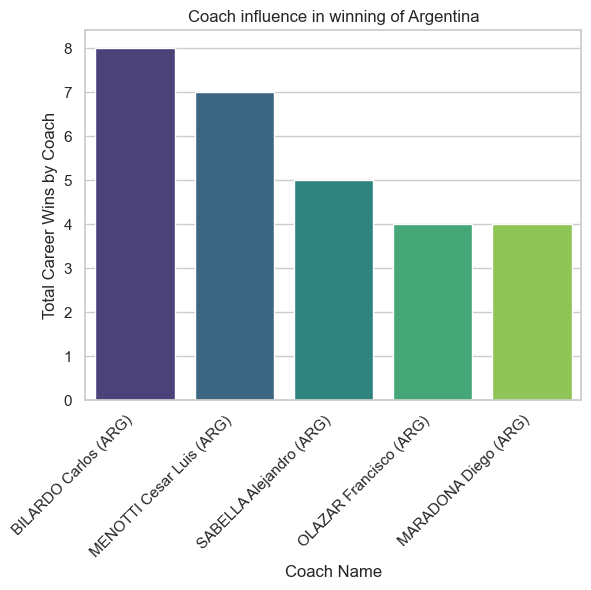

In [50]:
get_coach_influence('Argentina')

,WorldCup Winning Coaches
0,SUPPICI Alberto (URU)


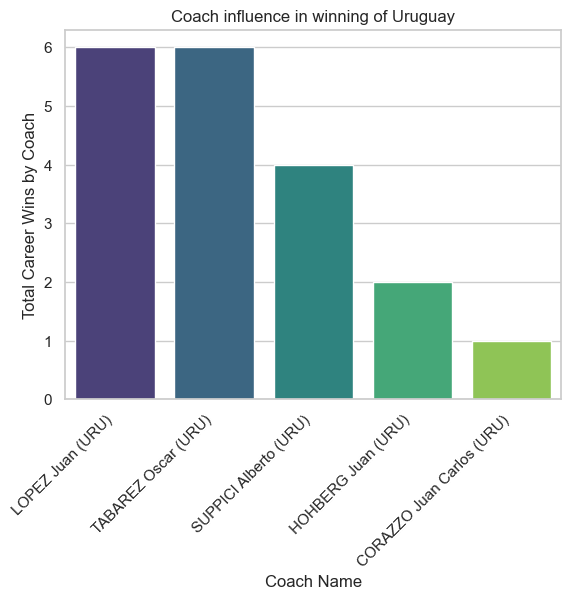

In [51]:
get_coach_influence('Uruguay')

,WorldCup Winning Coaches
0,POZZO Vittorio (ITA)
1,BEARZOT Enzo (ITA)


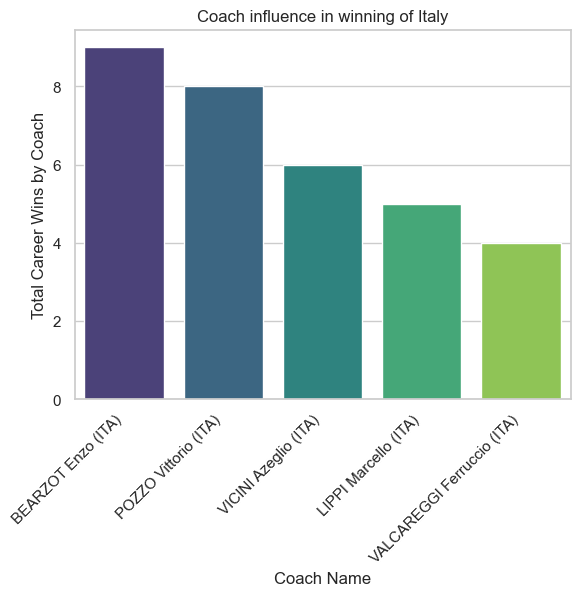

In [52]:
get_coach_influence('Italy')

> Here coaches who have made their teams win `the most number of times` in their respective careers are also winning the world cups for their teams.

In [53]:
def get_team_lineup_status_by_wc_wins(team_name, lineup_status):
    # Get all years in which the team won the World Cup Final
    wc_win_years = df_matches[(df_matches.matchWinner == team_name) & (df_matches.stage == 'Final')].year.tolist()
    
    all_starting_players = []

    for year in wc_win_years:
        players_in_matches = []
        
        # Get all match IDs for the team in the winning year, excluding the Final
        non_final_match_ids = df_matches[(df_matches.year == year) & 
                                         ((df_matches.homeTeam == team_name) | (df_matches.awayTeam == team_name)) & 
                                         (df_matches.stage != 'Final')].matchId.tolist()
        
        # Loop through each match ID and collect player names in the given lineup status
        for match_id in non_final_match_ids:
            match_players = df_players[(df_players.matchId == match_id) & 
                                       (df_players.teamName == team_name) & 
                                       (df_players.lineUp == lineup_status)].playerName.tolist()
            players_in_matches.extend(match_players)
        
        # Add players from non-final matches to the main list
        all_starting_players.extend(players_in_matches)

        # Get the final match ID for the specific year
        final_match_id = df_matches[(df_matches.year == year) & (df_matches.stage == 'Final')].matchId.tolist()[0]
        
        # Get players from the final match in the same lineup status
        final_match_players = df_players[(df_players.matchId == final_match_id) & 
                                         (df_players.teamName == team_name) & 
                                         (df_players.lineUp == lineup_status)].playerName.tolist()
        
        final_match_players = set(final_match_players)

        # Create a DataFrame showing the frequency of players who were in the starting lineup most often (excluding the final)
        player_frequency_df = pd.DataFrame(players_in_matches, columns=['Player']).value_counts().reset_index(name='Appearances')

        # Display the results
        print(f"\nYear: {year}")
        print("Players in the Final Match Lineup:\n")
        
        for index, item in enumerate(final_match_players, start=1):
            print(f"{index}: {item}")

        # Plot the player appearances as a bar chart
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Appearances', y='Player', data=player_frequency_df, palette='viridis')
        plt.title(f'Starting Lineup Appearances for {team_name} in {year} (Excluding Final)')
        plt.xlabel('Number of Starts')
        plt.ylabel('Player Names')
        plt.show()


Year: 1958
Players in the Final Match Lineup:

1: ZITO
2: PEL� (Edson Arantes do Nascimento)
3: DJALMA SANTOS
4: NILTON SANTOS
5: GILMAR (Gilmar Dos Santos Neves)
6: Mario ZAGALLO
7: BELLINI
8: DIDI
9: ORLANDO
10: VAVA
11: GARRINCHA


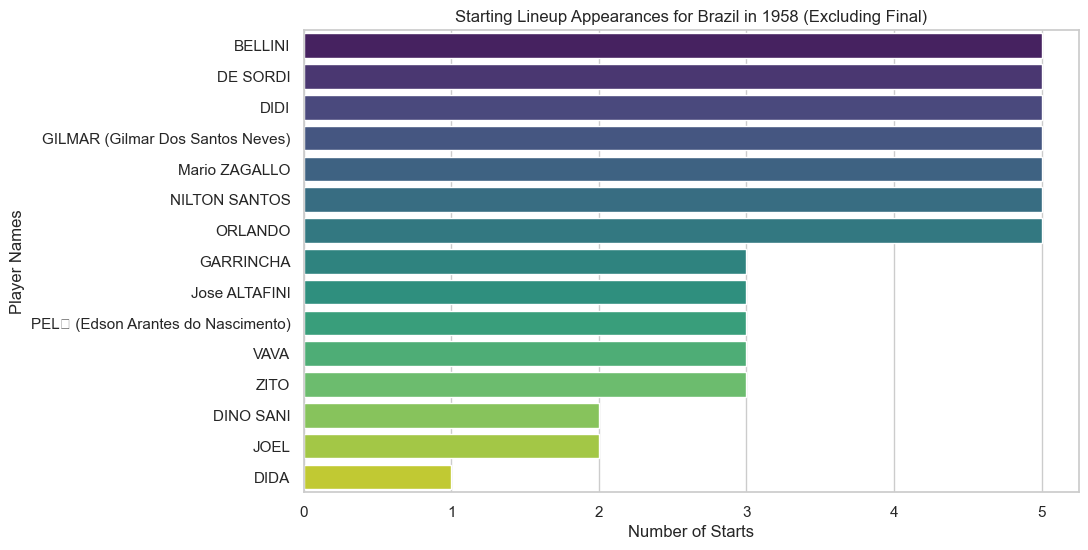


Year: 1962
Players in the Final Match Lineup:

1: ZITO
2: DJALMA SANTOS
3: ZOZIMO
4: NILTON SANTOS
5: GILMAR (Gilmar Dos Santos Neves)
6: Mario ZAGALLO
7: MAURO RAMOS
8: DIDI
9: AMARILDO
10: VAVA
11: GARRINCHA


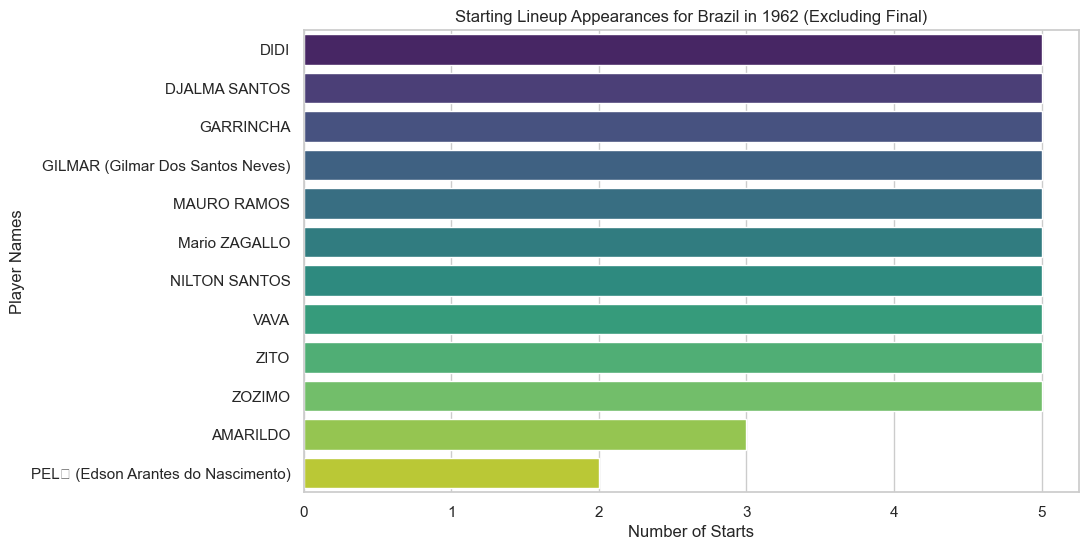


Year: 1970
Players in the Final Match Lineup:

1: RIVELINO
2: CARLOS ALBERTO
3: WILSON PIAZZA
4: FELIX
5: GERSON
6: PEL� (Edson Arantes do Nascimento)
7: BRITO
8: TOSTAO
9: CLODOALDO
10: EVERALDO
11: JAIRZINHO


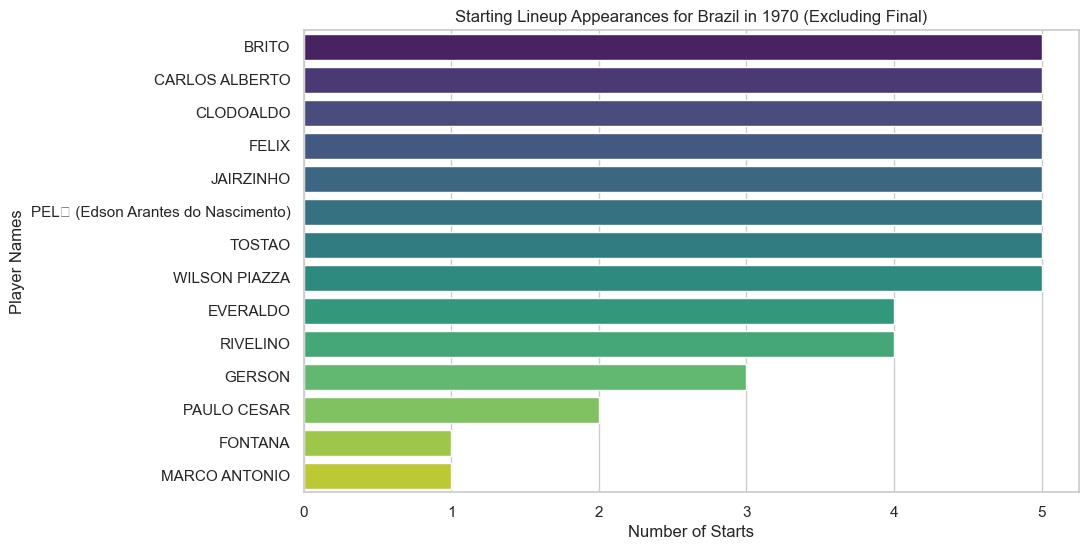


Year: 2002
Players in the Final Match Lineup:

1: LUCIO
2: KLEBERSON
3: GILBERTO
4: RIVALDO
5: ROQUE JR
6: RONALDINHO
7: RONALDO
8: R CARLOS
9: CAFU
10: EDMILSON
11: MARCOS


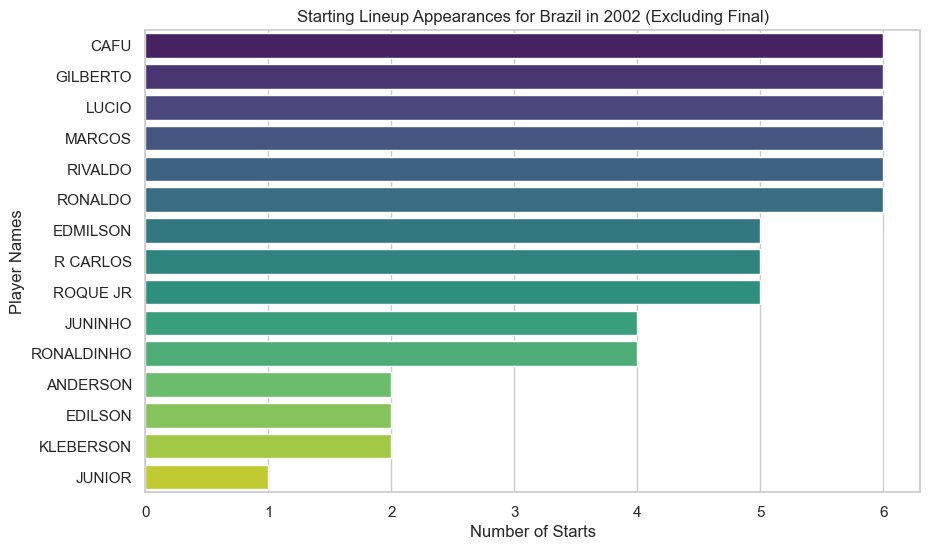

In [54]:
get_team_lineup_status_by_wc_wins("Brazil", "S")

> For Brazil, players who have played the maximum starting matches in the worldcup season have also played the final match and won the world cup.


Year: 1954
Players in the Final Match Lineup:

1: Fritz WALTER
2: Toni TUREK
3: Jupp POSIPAL
4: Helmut RAHN
5: WALTER
6: Horst ECKEL
7: Werner KOHLMEYER
8: Max MORLOCK
9: Hans SCHAEFER
10: Werner LIEBRICH
11: Karl MAI


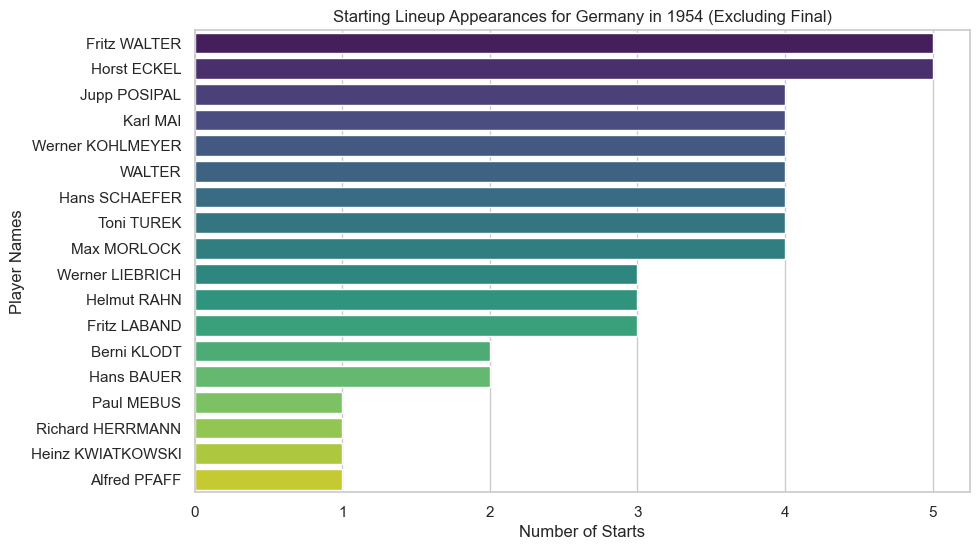


Year: 1974
Players in the Final Match Lineup:

1: Gerd MUELLER
2: Hans Georg SCHWARZENBECK
3: Paul BREITNER
4: Wolfgang OVERATH
5: Franz BECKENBAUER
6: Uli HOENESS
7: Rainer BONHOF
8: Sepp MAIER
9: Berti VOGTS
10: Juergen GRABOWSKI
11: Bernd HOELZENBEIN


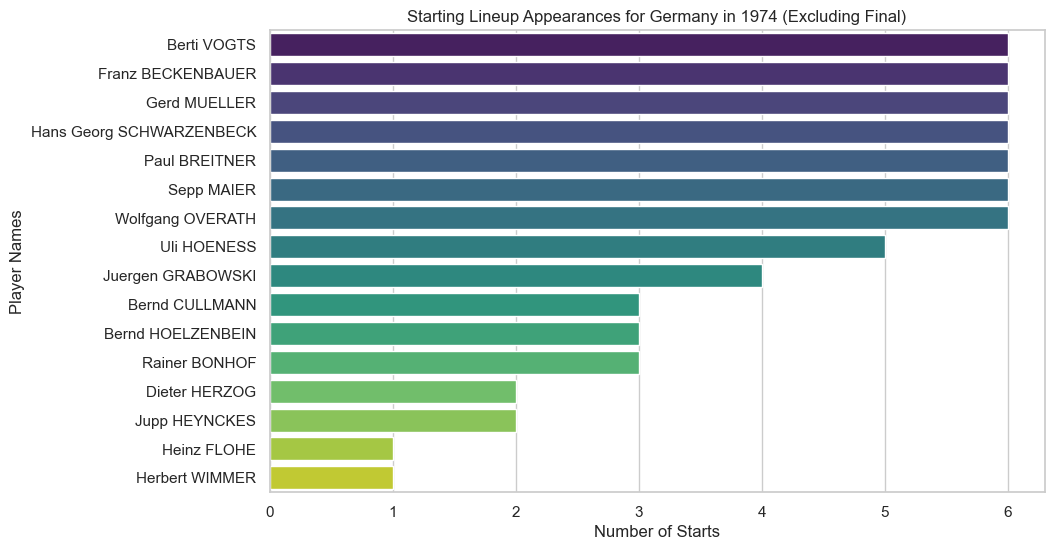


Year: 1990
Players in the Final Match Lineup:

1: Pierre LITTBARSKI
2: Thomas HAESSLER
3: Lothar MATTHAEUS
4: Klaus AUGENTHALER
5: Guido BUCHWALD
6: Thomas BERTHOLD
7: Bodo ILLGNER
8: Juergen KLINSMANN
9: Andreas BREHME
10: Juergen KOHLER
11: Rudi VOELLER


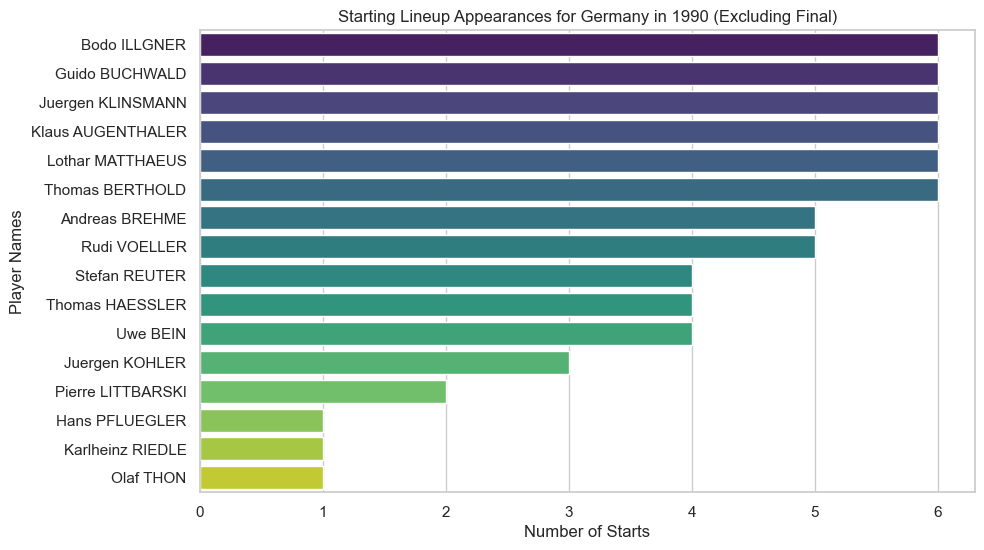


Year: 2014
Players in the Final Match Lineup:

1: M�LLER
2: LAHM
3: H�WEDES
4: SCHWEINSTEIGER
5: NEUER
6: KROOS
7: HUMMELS
8: BOATENG
9: KRAMER
10: KLOSE
11: �ZIL


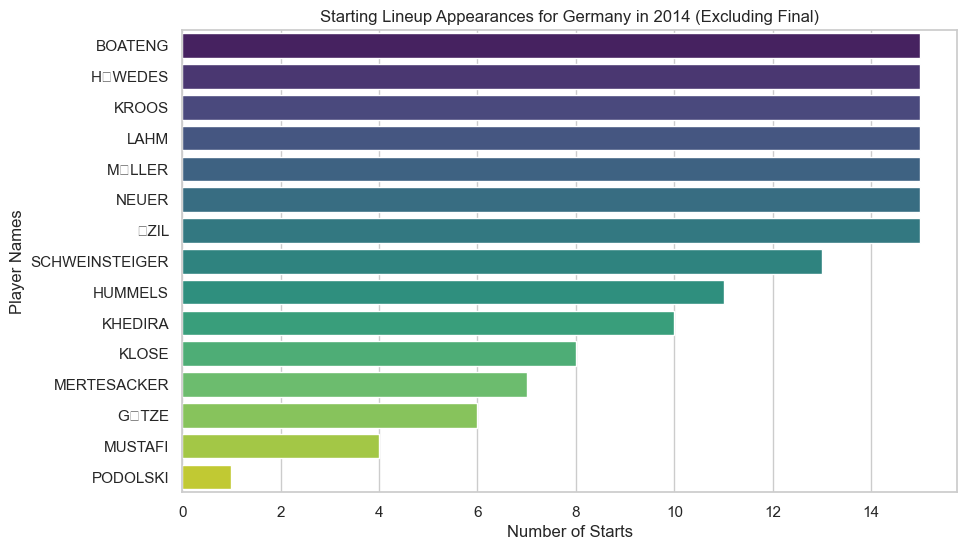


Year: 2014
Players in the Final Match Lineup:

1: M�LLER
2: LAHM
3: H�WEDES
4: SCHWEINSTEIGER
5: NEUER
6: KROOS
7: HUMMELS
8: BOATENG
9: KRAMER
10: KLOSE
11: �ZIL


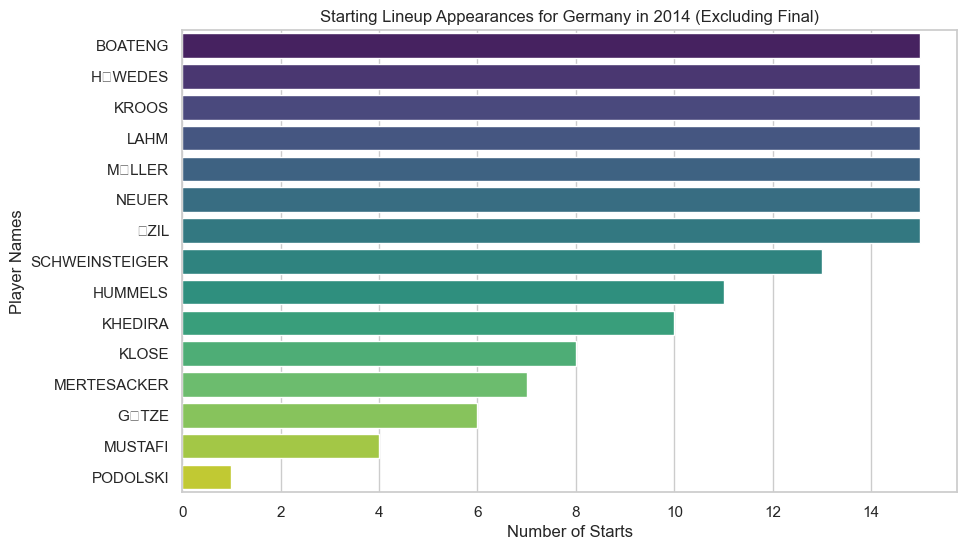

In [55]:
get_team_lineup_status_by_wc_wins("Germany", "S")

> For Germany, players who have played the maximum startig matches in the worldcup season have also played the final match and won the world cup.


Year: 1930
Players in the Final Match Lineup:

1: Pablo DORADO
2: Enrique BALLESTRERO
3: Ernesto MASCHERONI
4: Hector SCARONE
5: Pedro CEA
6: Alvaro GESTIDO
7: Victoriano IRIARTE
8: Hector CASTRO
9: Jose NASAZZI
10: Jose ANDRADE
11: Lorenzo FERNANDEZ


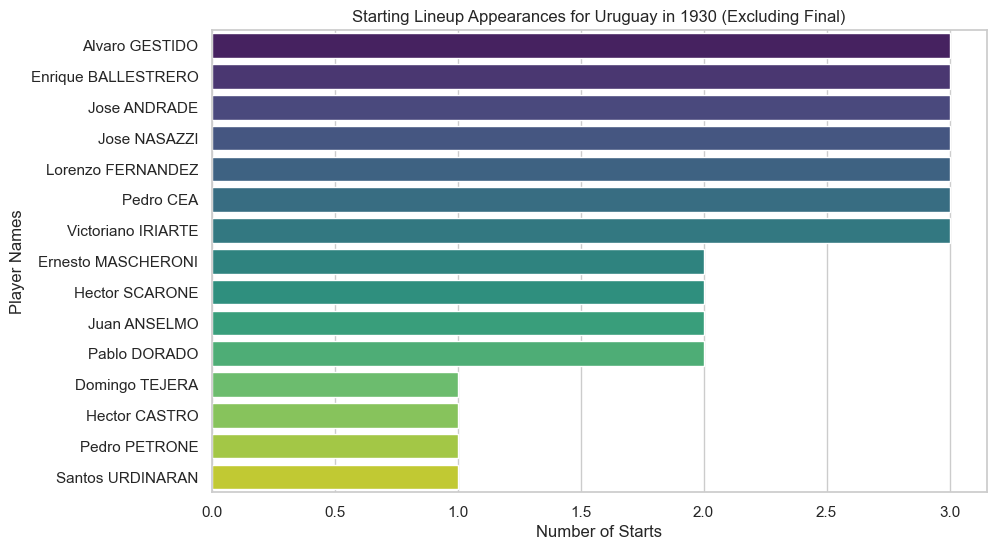

In [56]:
get_team_lineup_status_by_wc_wins("Uruguay", "S")

> For Uruguay, players who have played the maximum startig matches in the worldcup season have also played the final match and won the world cup.


Year: 1978
Players in the Final Match Lineup:

1: Daniel BERTONI
2: Alberto TARANTINI
3: Luis GALVAN
4: Ubaldo FILLOL
5: Oscar ORTIZ
6: Jorge OLGUIN
7: Osvaldo ARDILES
8: Daniel PASSARELLA
9: Leopoldo LUQUE
10: Americo GALLEGO
11: Mario KEMPES


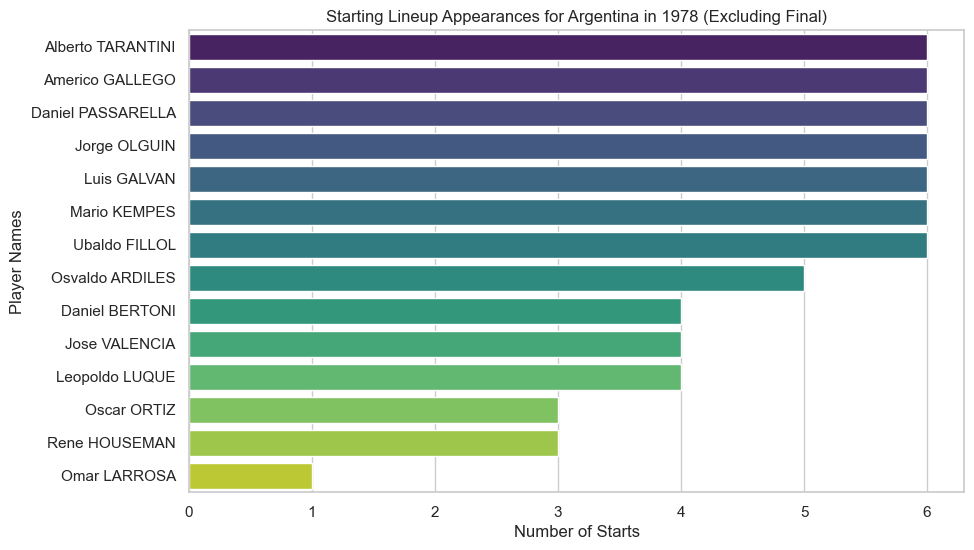


Year: 1986
Players in the Final Match Lineup:

1: Oscar RUGGERI
2: Nery PUMPIDO
3: Hector ENRIQUE
4: Jorge VALDANO
5: Diego MARADONA
6: Sergio BATISTA
7: Ricardo GIUSTI
8: Jose CUCIUFFO
9: Julio OLARTICOECHEA
10: Jorge BURRUCHAGA
11: Jose BROWN


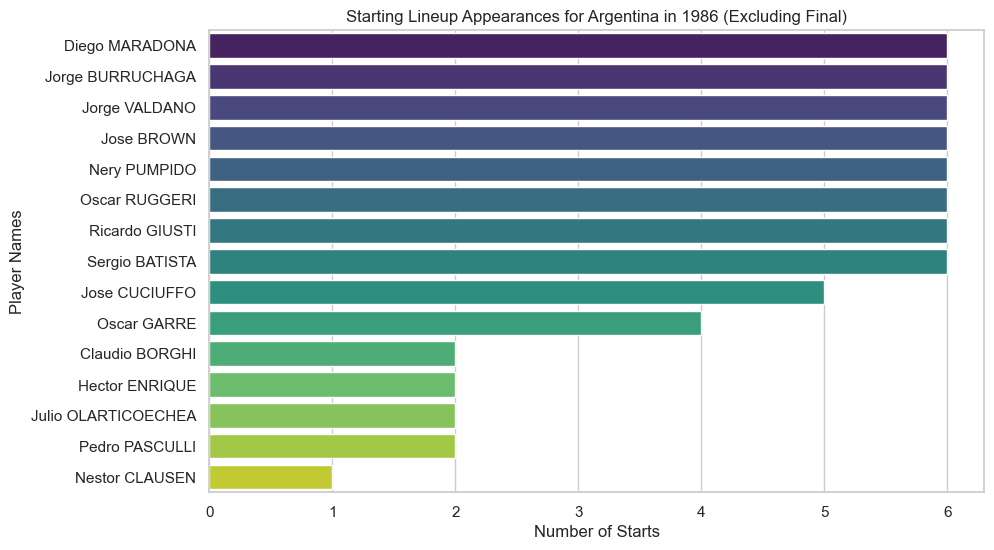

In [57]:
get_team_lineup_status_by_wc_wins("Argentina", "S")

> For Argentina, players who have played the maximum startig matches in the worldcup season have also played the final match and won the world cup.


Year: 1934
Players in the Final Match Lineup:

1: Enrique GUAITA
2: Giovanni FERRARI
3: Giuseppe MEAZZA
4: Luigi ALLEMANDI
5: Giampiero COMBI
6: Luigi BERTOLINI
7: Attilio FERRARIS
8: Angelo SCHIAVIO
9: Luis MONTI
10: Eraldo MONZEGLIO
11: Raimundo ORSI


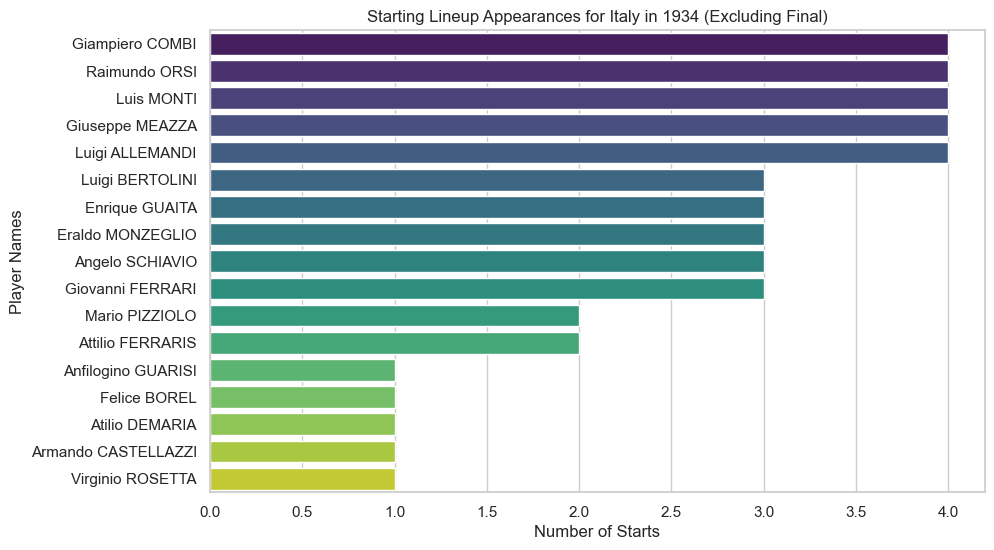


Year: 1938
Players in the Final Match Lineup:

1: Michele ANDREOLO
2: Gino COLAUSSI
3: Alfredo FONI
4: Amedeo BIAVATI
5: Giovanni FERRARI
6: Aldo OLIVIERI
7: Giuseppe MEAZZA
8: Pietro RAVA
9: Pietro SERANTONI
10: Silvio PIOLA
11: Ugo LOCATELLI


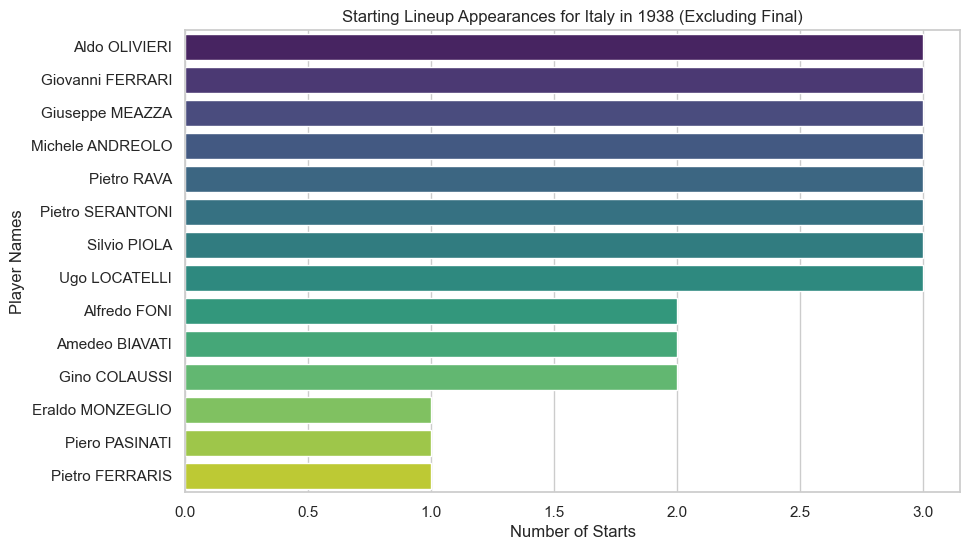


Year: 1982
Players in the Final Match Lineup:

1: Marco TARDELLI
2: Antonio CABRINI
3: Dino ZOFF
4: Gaetano SCIREA
5: Gabriele ORIALI
6: Paolo ROSSI
7: Bruno CONTI
8: Claudio GENTILE
9: Francesco GRAZIANI
10: Fulvio COLLOVATI
11: Giuseppe BERGOMI


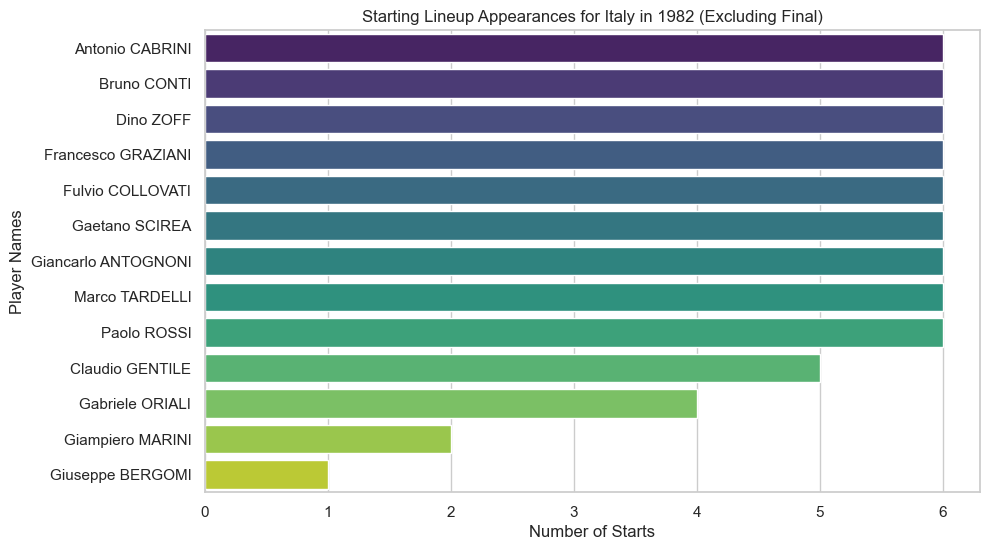

In [58]:
get_team_lineup_status_by_wc_wins("Italy", "S")

> For Italy, players who have played the maximum startig matches in the worldcup season have also played the final match and won the world cup.


Year: 2010
Players in the Final Match Lineup:

1: PIQU�
2: CASILLAS
3: CAPDEVILA
4: ALONSO
5: SERGIO
6: DAVID VILLA
7: PUYOL
8: A.INIESTA
9: XAVI
10: PEDRO
11: RAMOS


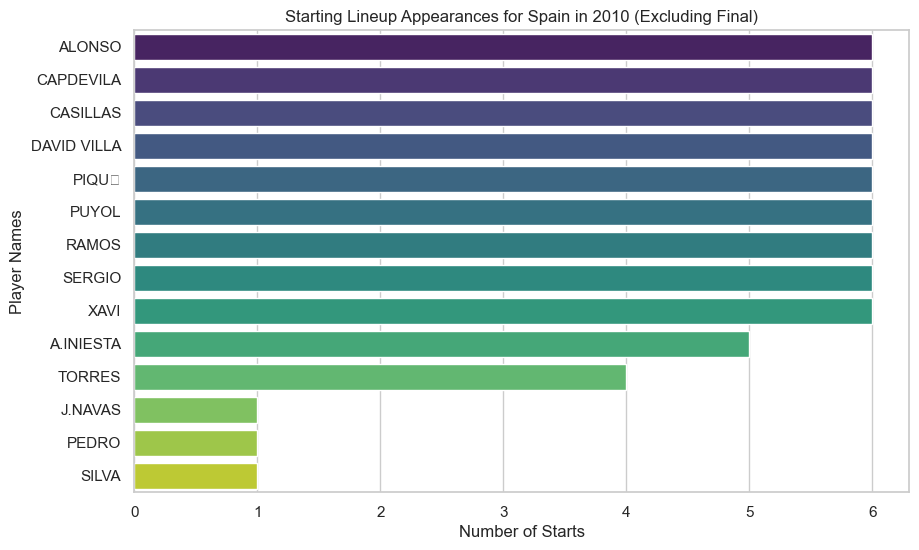

In [59]:
get_team_lineup_status_by_wc_wins("Spain", "S")

> For Spain, players who have played the maximum startig matches in the worldcup season have also played the final match and won the world cup.

### For the world cup winning teams, players who have played the maximum starting matches in the worldcup season have also played the final match and won the world cup.

# 5. Conclusion

## After performing the analysis on the data we have found out that.
- Both `Brazil` and `Germany` have consistently adopted an aggressive playing style during the seasons in which they secured World Cup victories.
- In contrast, `Argentina`, `France`, `Uruguay`, and `Italy` have demonstrated a more defensive approach in their winning campaigns.
- The top five teams, each with multiple World Cup titles, tend to perform exceptionally well when playing on home grounds.
- For these teams, the coaches who led their squads to the most victories have also secured World Cup titles.
- Additionally, players who were part of the starting lineup for the majority of matches were also selected for the final match and contributed to their team’s ultimate victory.